# pRF-fitting with different design matrix sizes

The goal of this notebook is to verify to what extent the size of the design matrix affects pRF estimates. For all my pRF-fitting so far, I've used a size of 270 pixels, which results in endless computation time.. I'd like to reduce that without affecting the prf-estimates. 

In [4]:
%matplotlib inline

In [118]:
# some imports
from linescanning import utils, plotting, prf
from pRFline import fitting
import numpy as np
import warnings
import matplotlib.pyplot as plt
import os
from scipy import interpolate
from sklearn.metrics import r2_score
import random
import pandas as pd
opj = os.path.join

warnings.simplefilter('ignore')
project_dir = os.environ.get("DIR_PROJECTS")
base_dir = os.path.join(project_dir, 'VE-pRF')
deriv_dir = opj(base_dir, 'derivatives')

plot_vox = 359
plot_xkcd = False

In [2]:
# load data
sub = "sub-005"
pars = utils.get_file_from_substring(["model-gauss", "stage-iter", "params.pkl"], opj(deriv_dir, 'prf', sub, 'ses-1'))
results = fitting.pRFResults(pars, verbose=True, TR=1.5)

Loading in files:
 pRF params:    /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-gauss_stage-iter_desc-prf_params.pkl
 Design matrix: /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_desc-design_matrix.mat
 fMRI data:     /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_desc-data.npy
Setting rsq-threshold to default value: 0.1
Using settings file: /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-005/ses-1/20220603_model-norm_desc-settings.yml
Reading settings from pickle-file (safest option; overwrites other settings)


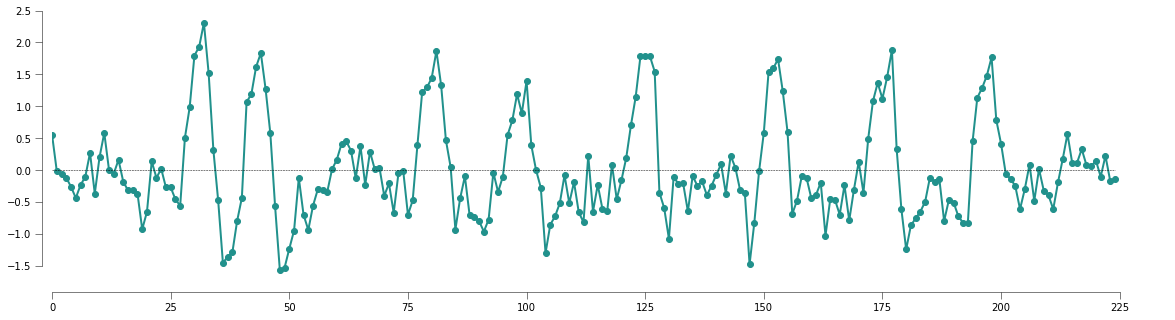

In [5]:
vox_nr = 2348
vox_data = results.data[:,vox_nr]
plotting.LazyPlot(vox_data, 
                  sns_trim=True, 
                  line_width=2, 
                  markers="o", 
                  add_hline='default',
                  figsize=(20,5))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


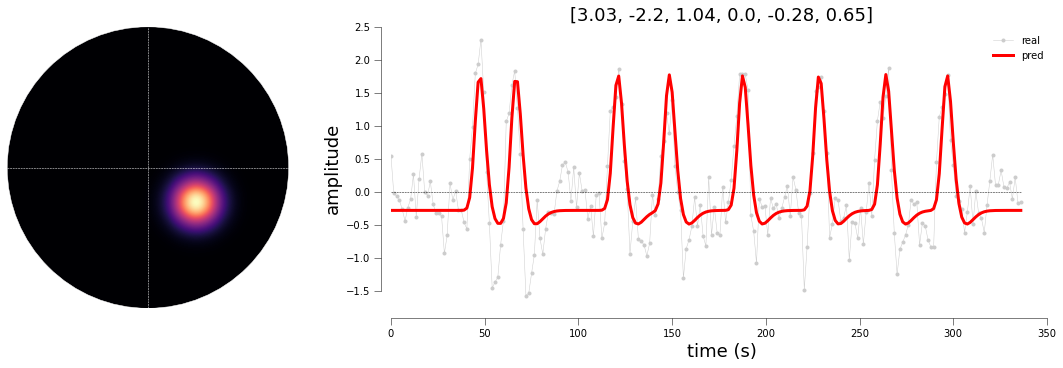

In [6]:
pred1,_,_ = results.model_fit.plot_vox(vox_nr=vox_nr, model=results.model, axis_type="time", title="pars")

In [7]:
png_path = "/data1/projects/MicroFunc/Jurjen/projects/hemifield/sourcedata/sub-005/ses-1/prf/sub-005_ses-1_task-2R_run-2_Logs/sub-005_ses-1_task-2R_run-2_Screenshots"
dm_lowres = prf.get_prfdesign(png_path, n_pix=54)

In [8]:
# fit
print("\nFitting with low-resolution design matrix")
norm_low = prf.pRFmodelFitting(vox_data[...,np.newaxis].T, 
                               design_matrix=dm_lowres, 
                               TR=results.TR, 
                               model="norm", 
                               stage='grid+iter')
norm_low.fit()

print("Fitting with high-resolution design matrix")
norm_high = prf.pRFmodelFitting(vox_data[...,np.newaxis].T, 
                                design_matrix=results.design, 
                                TR=results.TR, 
                                model="norm", 
                                stage='grid+iter',
                                old_params=results.model_fit.gauss_iter[vox_nr,...][np.newaxis,...])
norm_high.fit()



Fitting with low-resolution design matrix
Setting rsq-threshold to default value: 0.1
Starting gauss grid fit at 2022/07/11 08:47:33
Gaussian gridfit completed at 2022/07/11 08:47:34. voxels/vertices above 0.1: 1 out of 1
Gridfit took 0:00:01.187240
Mean rsq>0.1: 0.66
Starting gauss iterfit at 2022/07/11 08:47:34
Gaussian iterfit completed at 2022/07/11 08:47:34. Mean rsq>0.1: 0.67
Iterfit took 0:00:00.029938
Using settings file: None
Starting norm grid fit at 2022/07/11 08:47:34
Norm gridfit completed at 2022/07/11 08:47:35. Mean rsq>0.1: 0.69
Gridfit took 0:00:00.106249
Starting norm iterfit at 2022/07/11 08:47:35


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Norm iterfit completed at 2022/07/11 08:47:40. Mean rsq>0.1: 0.69
Iterfit took 0:00:05.461852
Fitting with high-resolution design matrix
Setting rsq-threshold to default value: 0.1
Using settings file: None
Starting norm grid fit at 2022/07/11 08:47:41


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished


Norm gridfit completed at 2022/07/11 08:47:44. Mean rsq>0.1: 0.68
Gridfit took 0:00:02.309464
Starting norm iterfit at 2022/07/11 08:47:44
Norm iterfit completed at 2022/07/11 08:50:37. Mean rsq>0.1: 0.69
Iterfit took 0:02:53.076684


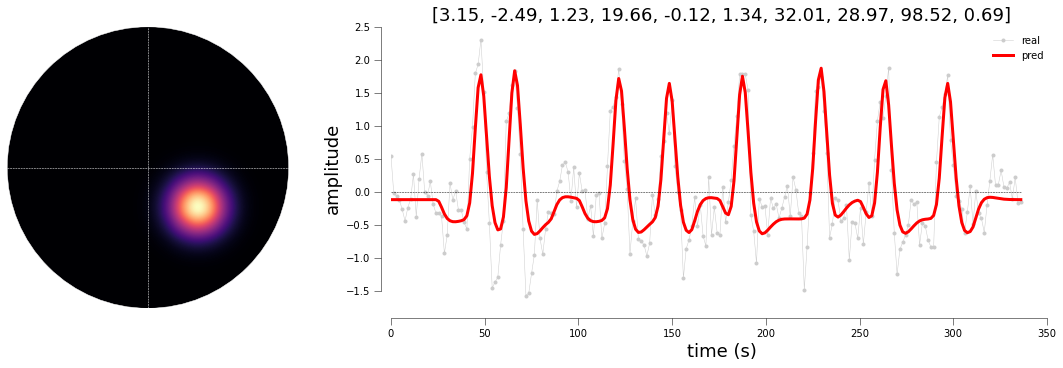

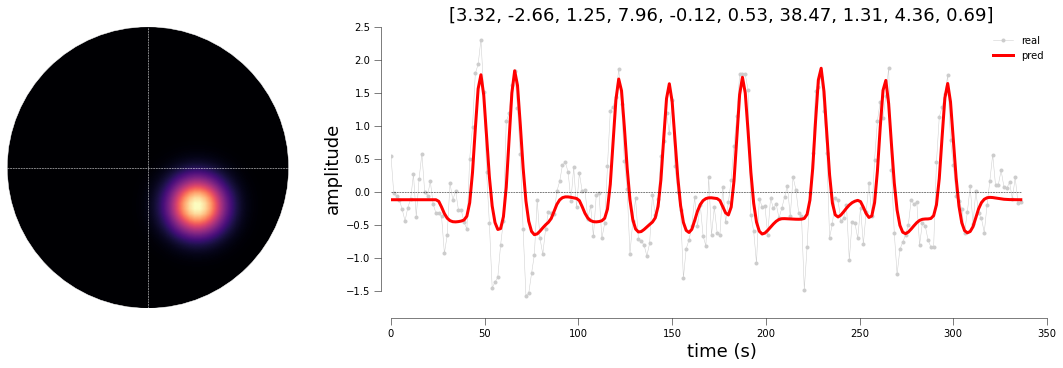

In [94]:
pars_high,prf_high,tc_high = norm_high.plot_vox(model='norm', axis_type="time", title="pars")
pars_low,prf_low,tc_low = norm_low.plot_vox(model='norm', axis_type="time", title="pars", resize_pix=270)

Stuff below is now implemented in `linscanning.utils.resample2d`

Text(0.5, 0.98, 'Upsampling from low-res design')

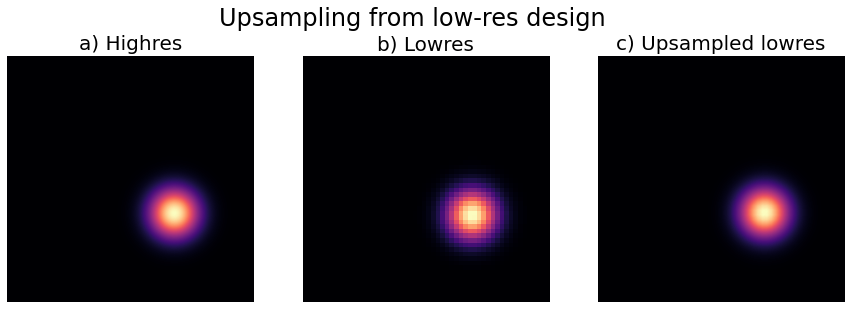

In [36]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
prf_1 = np.squeeze(prf_high, axis=0)
prf_2 = np.squeeze(prf_low, axis=0)

# highres
axs[0].imshow(prf_1, cmap='magma')
axs[0].set_title("a) Highres", fontsize=20)

# lowres
axs[1].imshow(prf_2, cmap='magma')
axs[1].set_title("b) Lowres", fontsize=20)

# upsample
x = np.array(range(prf_2.shape[-1]))
y = np.array(range(prf_2.shape[-1]))
f = interpolate.interp2d(x, y, prf_2, kind='linear')

xnew = np.linspace(0, x.shape[0], 270)
ynew = np.linspace(0, y.shape[0], 270)
prf_3 = f(xnew, ynew)

axs[2].imshow(prf_3, cmap='magma')
axs[2].set_title("c) Upsampled lowres", fontsize=20)

for ax in axs:
    ax.axis('off')

fig.suptitle("Upsampling from low-res design", fontsize=24)

The precision with which pRF size can be measured by fMRI depends on a number of elements:

- Neuronal scatter (a measure of positional variance of neurons, coding spatial positions)
- Visual stimuli
- Number of datapoints 

pRF estimates across depth can vary about 20%, so we need to verify that our design matrix is capable of detecting such changes. Generally, our selected pRFs will have a size of around 1dva. So, we'll create separate timecourses to check if the estimation is able to assign the correct pRF-size

In [51]:
pars_low_80 = pars_low.copy()
pars_low_80[2] *= .8
pars_low_80

array([ 3.320807  , -2.65624113,  1.00074578,  7.95965595, -0.11868952,
        0.52924503, 38.46685761,  1.31441906,  4.36250055,  0.69273314])

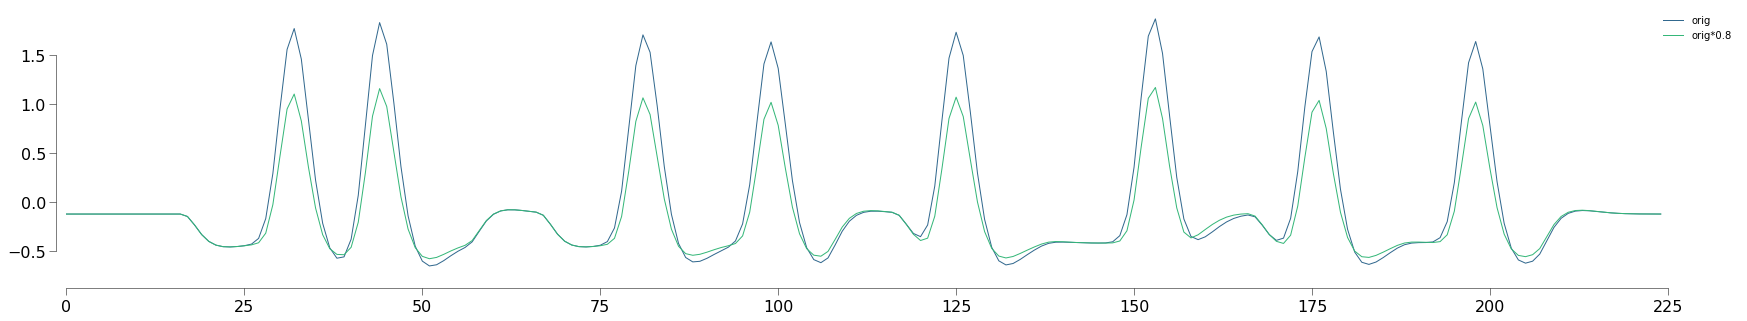

In [54]:
pred_1 = norm_low.plot_vox(model='norm', make_figure=False)[-1]
pred_2 = norm_low.norm_model.return_prediction(*pars_low_80[:-1]).T

plotting.LazyPlot([pred_1,pred_2], 
                  labels=['orig', 'orig*0.8'],
                  font_size=20,
                  label_size=16)

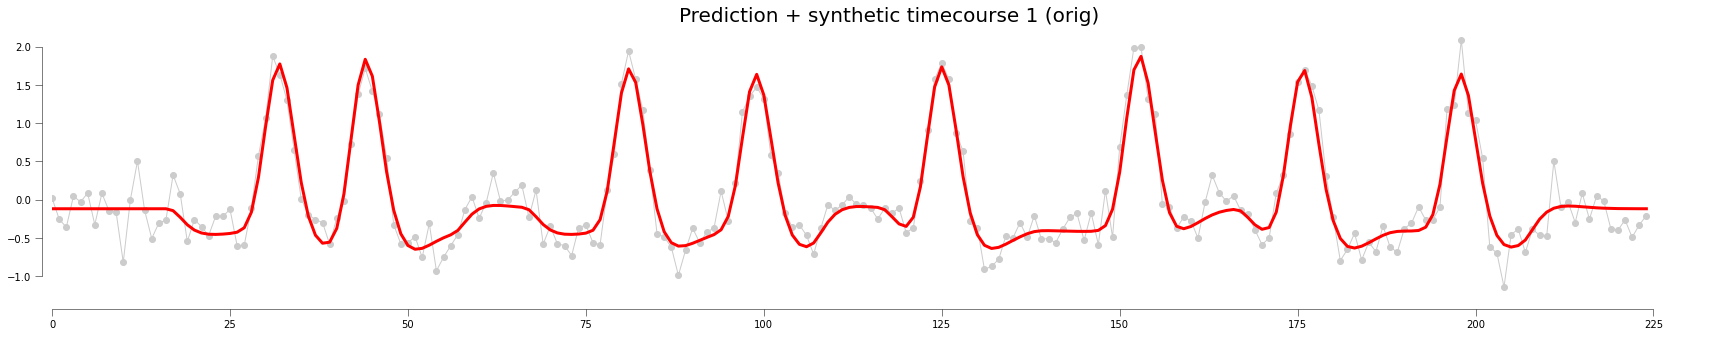

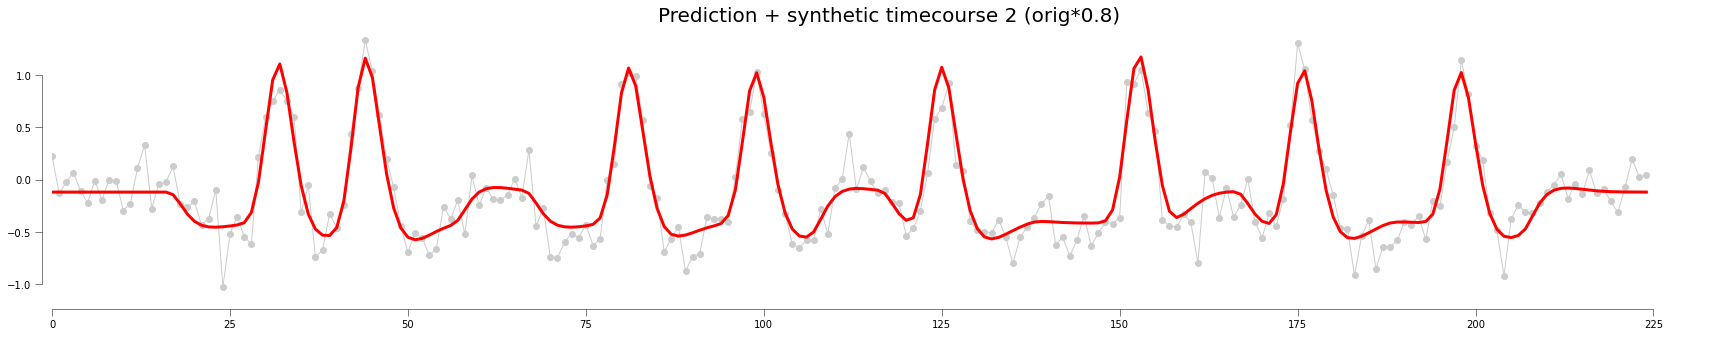

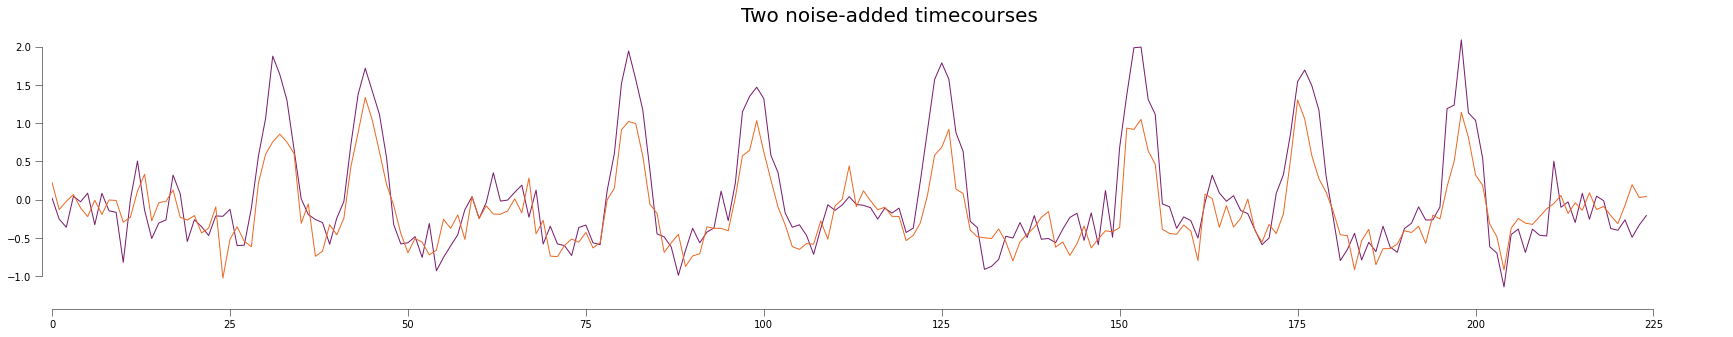

In [137]:
noise_level = 0.2
sim_1 = pred_1 + np.random.normal(0,noise_level,pred_1.shape)
sim_2 = pred_2 + np.random.normal(0,noise_level,pred_2.shape)

plotting.LazyPlot([sim_1, pred_1], 
                  color=["#cccccc", "r"], 
                  line_width=[1,3], 
                  markers=["o", None], 
                  title="Prediction + synthetic timecourse 1 (orig)", font_size=20)

plotting.LazyPlot([sim_2, pred_2], 
                  color=["#cccccc", "r"], 
                  line_width=[1,3], 
                  markers=["o", None], 
                  title="Prediction + synthetic timecourse 2 (orig*0.8)", font_size=20)

clrs = sns.color_palette('inferno', 2)
plotting.LazyPlot([sim_1, sim_2], 
                  color=clrs, 
                  title="Two noise-added timecourses", font_size=20)

In [125]:
# sim_1 + pred_1
r2_sim1_pred1 = r2_score(sim_1, pred_1)
r2_sim1_pred2 = r2_score(sim_1, pred_2)
r2_sim2_pred1 = r2_score(sim_2, pred_1)
r2_sim2_pred2 = r2_score(sim_2, pred_2)

r2_all = np.array(([r2_sim1_pred1, r2_sim1_pred2], [r2_sim2_pred1, r2_sim2_pred2]))
r2_df = pd.DataFrame(r2_all, columns=['pred1', 'pred2'], index=['sim1', 'sim2'])
r2_df

,pred1,pred2
sim1,0.913577,0.778541
sim2,0.576309,0.818081


In [126]:
# run model with simulated timecourse 1
model_1 = prf.pRFmodelFitting(sim_1.T, 
                              design_matrix=dm_lowres, 
                              TR=results.TR, 
                              model="norm", 
                              stage='grid+iter',
                              verbose=False)
model_1.fit()

# run model with simulated timecourse 2
model_2 = prf.pRFmodelFitting(sim_2.T, 
                              design_matrix=dm_lowres, 
                              TR=results.TR, 
                              model="norm", 
                              stage='grid+iter',
                              verbose=False)
model_2.fit()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Norm iterfit completed at 2022/07/11 14:17:14. Mean rsq>0.1: 0.91
Iterfit took 0:00:01.599663


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Norm iterfit completed at 2022/07/11 14:17:18. Mean rsq>0.1: 0.82
Iterfit took 0:00:02.976502


Theoretically, the fitter should be able to differentiate pRF-estimates as we simulated one timecourse having a pRF size of `1.25`, and the other of `1.25*0.8`. However, we see that the estimates don't differ too much other than in `r2`. From this, I conclude that a design matrix of `54` pixels is not able to pick up these differences

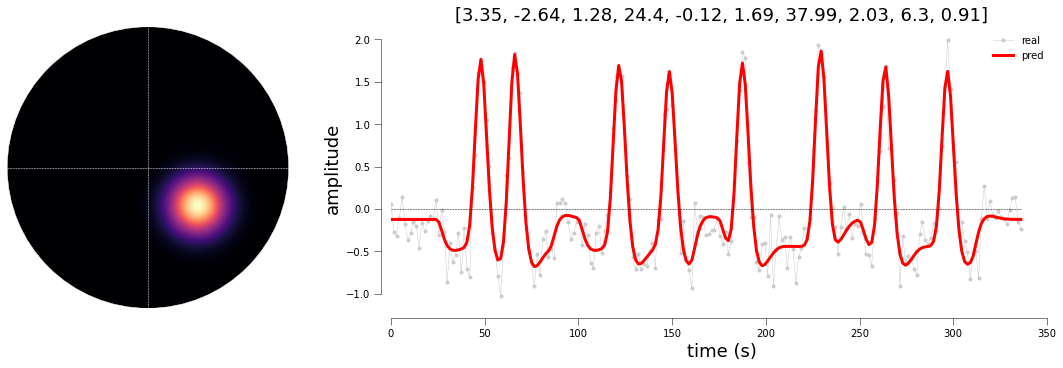

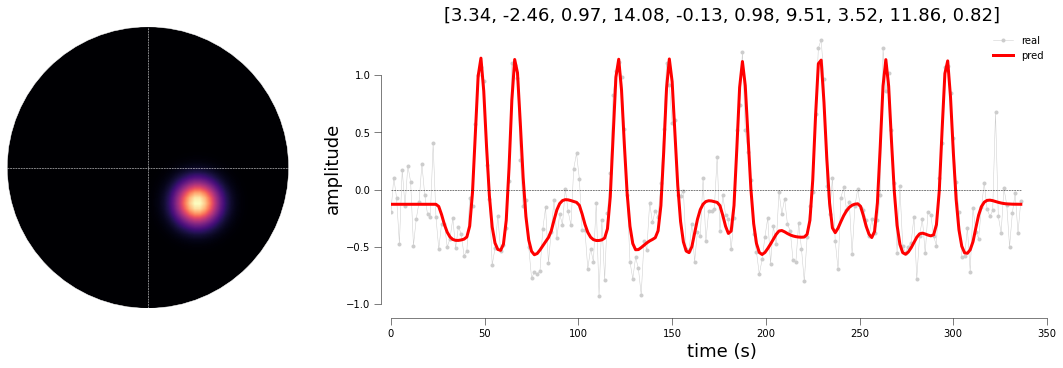

In [133]:
pars1,_,_ = model_1.plot_vox(model='norm', axis_type="time", title="pars", resize_pix=270)
pars2,_,_ = model_2.plot_vox(model='norm', axis_type="time", title="pars", resize_pix=270)

Estimate difference of obtained parameter with expected parameter across different noise levels

In [152]:
# create new design matrix
design_54px = dm_lowres.copy()
design_100px = prf.get_prfdesign(png_path, n_pix=100)
design_200px = prf.get_prfdesign(png_path, n_pix=200)
design_270px = results.design.copy()

In [170]:
noise_levels = np.arange(0,1,step=0.1)
model_diffs = []

df_diff = []
for ix,dm in enumerate([design_54px, design_100px, design_200px, design_270px]):
    
    print(f"Simulating model {ix+1}")
    diff1 = []
    diff2 = []
    for lvl in noise_levels:
        

        # create synthetic timecourse
        sim_1 = pred_1 + np.random.normal(0,lvl,pred_1.shape)
        sim_2 = pred_2 + np.random.normal(0,lvl,pred_2.shape)

        
        # run model with simulated timecourse 1
        model_1 = prf.pRFmodelFitting(sim_1.T, 
                                    design_matrix=dm, 
                                    TR=results.TR,  
                                    model="norm",  
                                    stage='grid+iter',
                                    verbose=False)
        model_1.fit()

        # run model with simulated timecourse 2
        model_2 = prf.pRFmodelFitting(sim_2.T, 
                                    design_matrix=dm, 
                                    TR=results.TR, 
                                    model="norm", 
                                    stage='grid+iter',
                                    verbose=False)
        model_2.fit()

        # get parameters
        pars1,_ = model_1.plot_vox(model='norm', make_figure=False)
        pars2,_ = model_2.plot_vox(model='norm', make_figure=False)

        diff1.append(pars1[2]-pars_low[2])
        diff2.append(pars2[2]-pars_low_80[2])

    diff1 = np.array(diff1)
    diff2 = np.array(diff2)

    diff_ = np.hstack((diff1[...,np.newaxis], diff2[...,np.newaxis]))
    df = pd.DataFrame(diff_, columns=['orig', 'sim'])
    df['model'] = ix+1
    df['noise_levels'] = noise_levels
    df_diff.append(df)

df_diff = pd.concat(df_diff)
df_diff = df_diff.set_index(['model', 'noise_levels'])

Simulating model 1
Simulating model 2
Simulating model 3
Simulating model 4


In [171]:
df_diff.to_csv("simulate.csv")

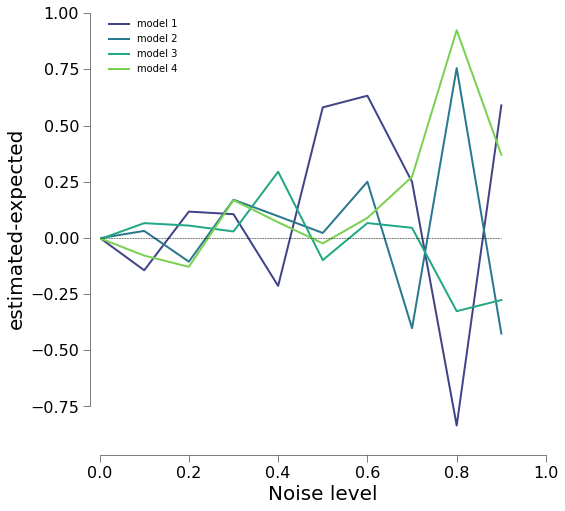

In [183]:
vals = [utils.select_from_df(df_diff, expression=f"model = {i+1}")['sim'].values for i in range(4)]
plotting.LazyPlot(vals,
                  xx=noise_levels,
                  line_width=2,
                  figsize=(8,8),
                  x_label="Noise level",
                  y_label="estimated-expected",
                  font_size=20,
                  label_size=16,
                  labels=[f"model {i+1}" for i in range(4)],
                  x_lim=[0,1],
                  add_hline='default')   

This shows that all models become less accurate with increasing noise levels. Not too surprising. It also shows that `model 1` (54px) already has quite a divergent estimation at lower noise levels, suggesting this might be too sparse for the expected difference.

This is highlighted below as well: with a noise level of `0.2`, the `real` and `fake` timecourses are estimated to have similar pRF-sizes (`1.21` and `1.19`, respectively), while we know the `fake` timecourse should have a pRF-size of `1`. 

In [186]:
sim_1 = pred_1 + np.random.normal(0,0.2,pred_1.shape)
sim_2 = pred_2 + np.random.normal(0,0.2,pred_2.shape)

# select design
use_design = design_54px.copy()

# run model with simulated timecourse 1
model_1 = prf.pRFmodelFitting(sim_1.T, 
                              design_matrix=use_design, 
                              TR=results.TR, 
                              model="norm", 
                              stage='grid+iter',
                              verbose=False)
model_1.fit()

# run model with simulated timecourse 2
model_2 = prf.pRFmodelFitting(sim_2.T, 
                              design_matrix=use_design, 
                              TR=results.TR, 
                              model="norm", 
                              stage='grid+iter',
                              verbose=False)
model_2.fit()

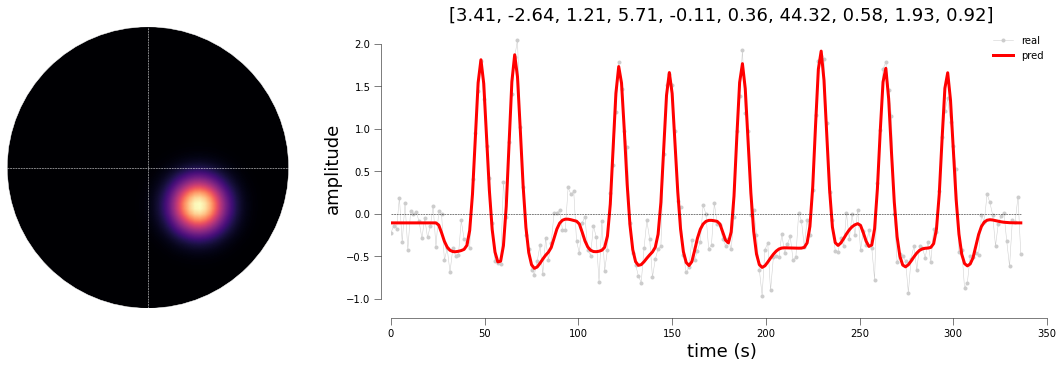

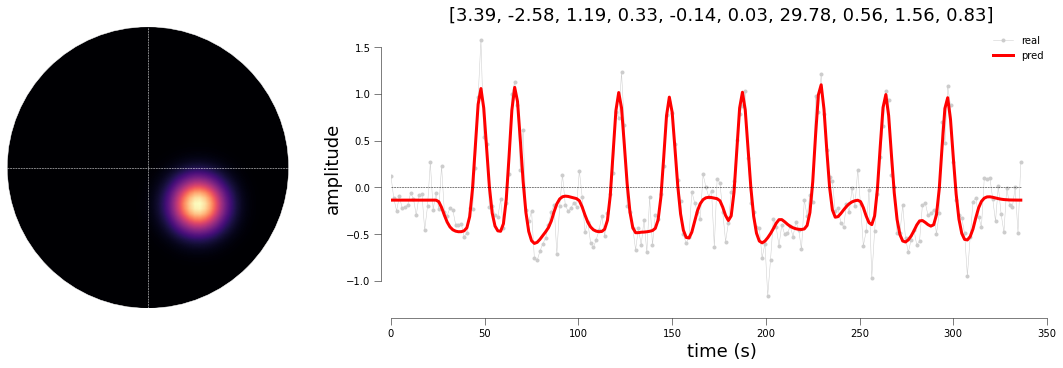

In [187]:
_,_,_ = model_1.plot_vox(model='norm', axis_type="time", title="pars", resize_pix=270)
_,_,_ = model_2.plot_vox(model='norm', axis_type="time", title="pars", resize_pix=270)

Doing the same with a higher resolution design matrix (100px) while keeping the noise level the same, we approximately get the expected pRF-sizes (`1.3` for real timecourse, `1.08` for fake timecourse)

In [188]:
sim_1 = pred_1 + np.random.normal(0,0.2,pred_1.shape)
sim_2 = pred_2 + np.random.normal(0,0.2,pred_2.shape)

# select design
use_design = design_100px.copy()

# run model with simulated timecourse 1
model_1 = prf.pRFmodelFitting(sim_1.T, 
                              design_matrix=use_design, 
                              TR=results.TR, 
                              model="norm", 
                              stage='grid+iter',
                              verbose=False)
model_1.fit()

# run model with simulated timecourse 2
model_2 = prf.pRFmodelFitting(sim_2.T, 
                              design_matrix=use_design, 
                              TR=results.TR, 
                              model="norm", 
                              stage='grid+iter',
                              verbose=False)
model_2.fit()

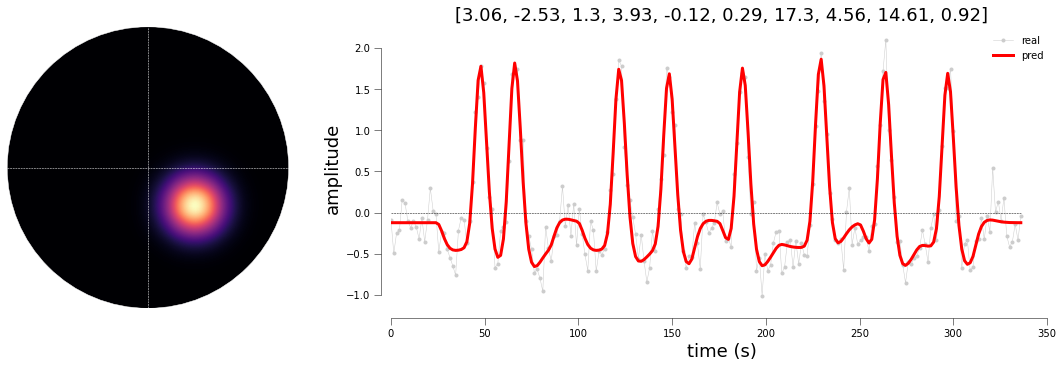

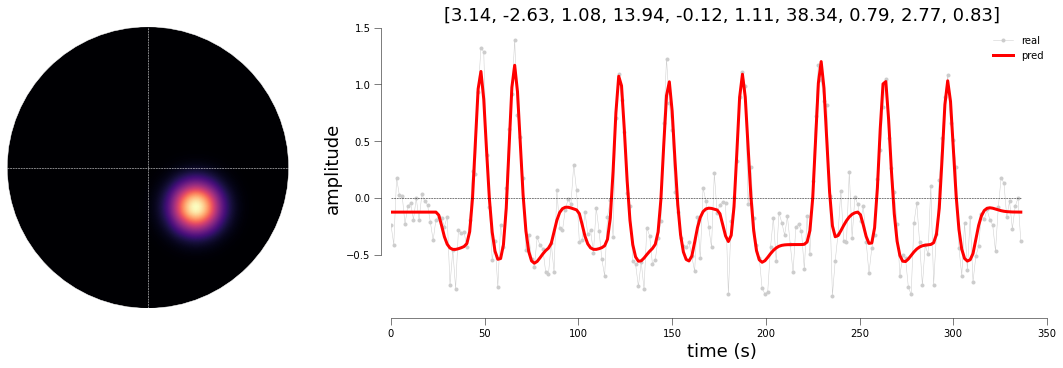

In [189]:
_,_,_ = model_1.plot_vox(model='norm', axis_type="time", title="pars", resize_pix=270)
_,_,_ = model_2.plot_vox(model='norm', axis_type="time", title="pars", resize_pix=270)

Text(0.5, 1.0, '270px')

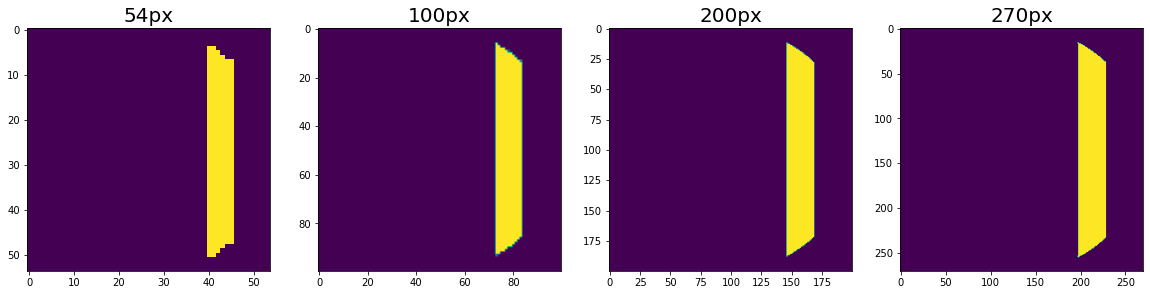

In [192]:
fig,axs = plt.subplots(1,4, figsize=(20,10))

axs[0].imshow(design_54px[...,30])
axs[0].set_title("54px",fontsize=20)

axs[1].imshow(design_100px[...,30])
axs[1].set_title("100px",fontsize=20)

axs[2].imshow(design_200px[...,30])
axs[2].set_title("200px",fontsize=20)

axs[3].imshow(design_270px[...,30])
axs[3].set_title("270px",fontsize=20)

In [196]:
design_54px.shape

(54, 54, 225)

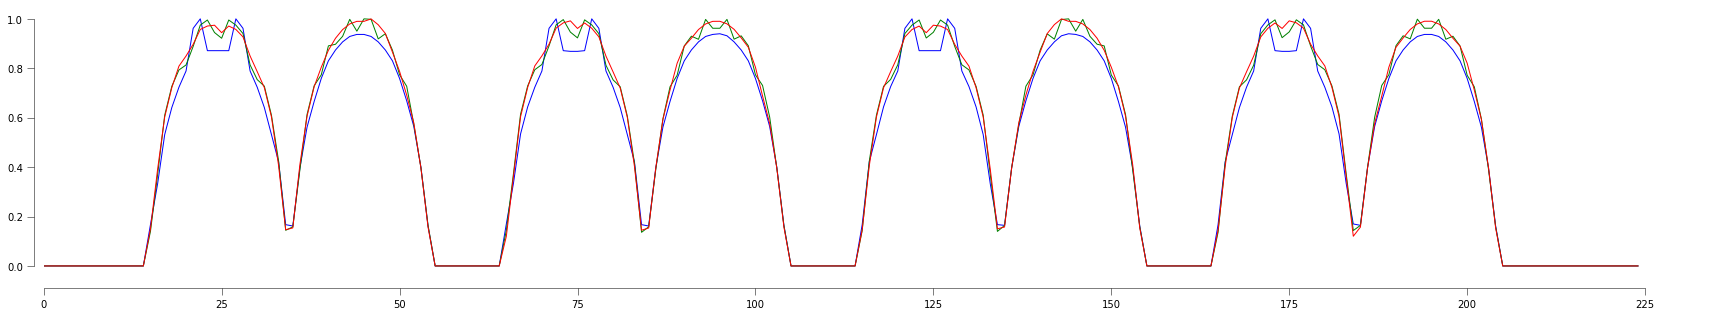

In [201]:
sum1 = np.sum(design_54px, axis=(0,1))/np.sum(design_54px, axis=(0,1)).max()
sum2 = np.sum(design_100px, axis=(0,1))/np.sum(design_100px, axis=(0,1)).max()
sum4 = np.sum(design_270px, axis=(0,1))/np.sum(design_270px, axis=(0,1)).max()
plotting.LazyPlot([sum1, sum2, sum4], color=['b','g','r'])